<a href="https://colab.research.google.com/github/dzurel/Churn/blob/master/Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dzurel/Churn/master/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [0]:
df_e0 = df.loc[df.Exited == 0, :]
df_e1 = df.loc[df.Exited == 1, :]

Text(0.5, 1.0, 'Left the Bank')

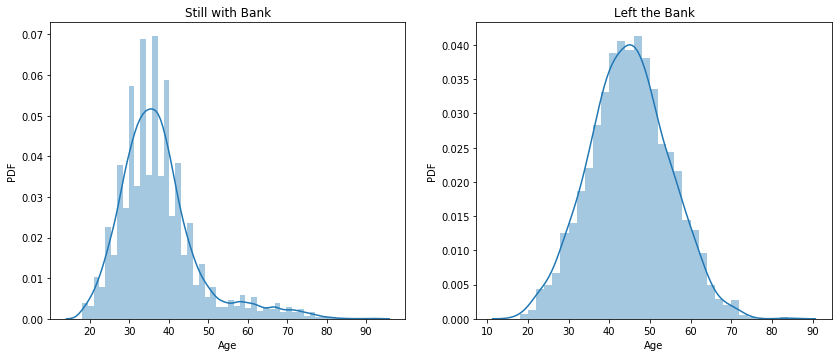

In [5]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
sns.distplot(df_e0['Age'])
plt.ylabel('PDF')
plt.title('Still with Bank')
plt.subplot(2,2,2)
sns.distplot(df_e1['Age'])
plt.ylabel('PDF')
plt.title('Left the Bank')


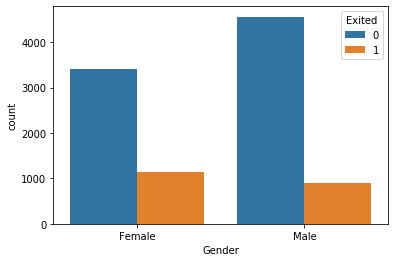

In [6]:
sns.countplot(df.Gender, hue=df.Exited)

### Inference
More female have left the bank than the male. The percentage of females left the bank is much higher than percentage of men who have left the bank.

In [7]:
perc_f_e1 = np.sum(df_e1.Gender == 'Female')*100 / np.sum(df.Gender == 'Female')
perc_m_e1 = np.sum(df_e1.Gender == 'Male')*100 / np.sum(df.Gender == 'Male')
perc_f_e1, perc_m_e1

(25.071538630860665, 16.455928165658786)

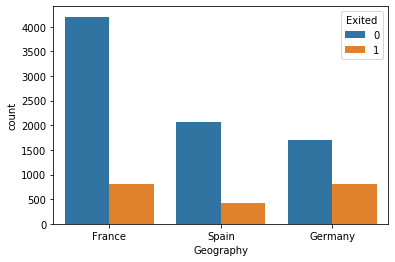

In [8]:
sns.countplot(df.Geography, hue=df.Exited)

In [9]:
perc_gf_e1 = np.sum(df_e1.Geography == 'France')*100 / np.sum(df.Geography == 'France')
perc_gs_e1 = np.sum(df_e1.Geography == 'Spain')*100 / np.sum(df.Geography == 'Spain')
perc_gg_e1 = np.sum(df_e1.Geography == 'Germany')*100 / np.sum(df.Geography == 'Germany')
perc_gf_e1, perc_gs_e1, perc_gg_e1

(16.15476665337056, 16.67339523617279, 32.44320446392985)

### Inference
It seems the highest percentage of people left by Geography is from Germany.

In [10]:
X = df.iloc[:,3:-1].values
y= df.iloc[:,-1].values


#Encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_1= LabelEncoder()
X[:,1]=le_1.fit_transform(X[:,1])
le_2 = LabelEncoder()
X[:,2]=le_2.fit_transform(X[:,2])
oh= OneHotEncoder(categorical_features=[1])
X=oh.fit_transform(X).toarray()

X = X[:,1:]


#splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


Checking the database to see if there is any null value

In [11]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Dropping unnecessary columns

In [0]:
df= df.drop(['RowNumber', 'CustomerId', 'Surname'], axis =1)

We can see that our target column is Exited. Lets examine it.

In [13]:
df.Exited.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [15]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [16]:
exitcor = df.corr()
exitcor["Exited"].sort_values(ascending=False)

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

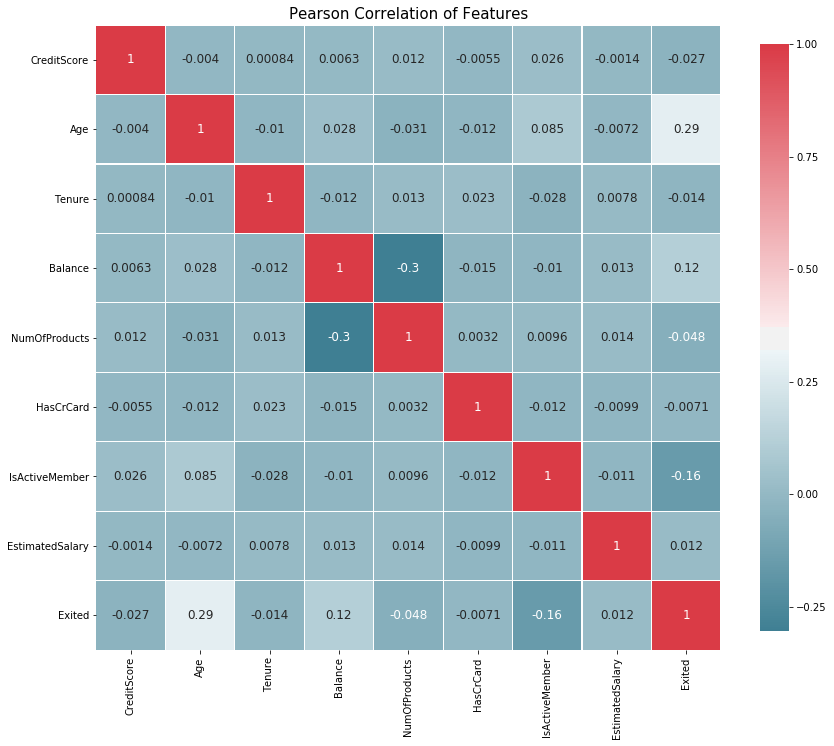

In [17]:
#correlation heatmap of dataset
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

Using dummies for Making Gender, Geography columns binary.

In [0]:
dfc =pd.concat([pd.get_dummies(df['Gender'], drop_first =True, prefix='Gender'),
              pd.get_dummies(df['Geography'], drop_first=True, prefix ='Geography'),
              df.drop(['Gender', 'Geography'], axis =1)], axis =1)

In [19]:
dfc.head()

,Gender_Male,Geography_Germany,Geography_Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


Splitting the data to rain and test sets and also dropping our target variable Exited.

Scaling the data using Standard Scaler

In [0]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

### **Machine Learning Modeling and Evaluating**



### XGBOOST

In [21]:
from sklearn.metrics import roc_auc_score

import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = xgb_model.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

0.8842414527447285
0.8735167769650528


### AdaBoost

In [22]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred =ada.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = ada.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

0.8586955726857326
0.8568512713340299


### Gradient Boosting

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
GBC =GradientBoostingClassifier()

GBC.fit(X_train, y_train)
y_pred =GBC.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))

y_pred = GBC.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

0.8866875738989063
0.874686326870235


### KNN K Neirest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
accuracy_score(knn.predict(X_test), y_test)

0.8445

In [25]:
knn = KNeighborsClassifier()
k_grid={'n_neighbors':np.arange(1,20)}
knn_cv=GridSearchCV(knn, k_grid, cv=10, refit=True, n_jobs=-1)
knn_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)
print(knn_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 19}
accuracy : 0.831625
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')


### SVM with "rbf" Kernel

In [26]:
from sklearn.svm import SVC

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 1, 10]
param_grid = {'C': Cs, 'gamma': gammas,'kernel': ['rbf'], 'probability':[True]}

SVM_rbf_cv = GridSearchCV(SVC(), param_grid, cv=3, refit=True, n_jobs=-1)
SVM_rbf_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_rbf_cv.best_params_)
print("accuracy :",SVM_rbf_cv.best_score_)
print(SVM_rbf_cv.best_estimator_)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accuracy : 0.853875
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [27]:
Cs = [1]
gammas = [0.1]
param_grid = {'C': Cs, 'gamma': gammas,'kernel': ['rbf'], 'probability':[True]}
SVM_rbf_cv_10 = GridSearchCV(SVC(), param_grid, cv=10, refit=True, n_jobs=-1)
SVM_rbf_cv_10.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_rbf_cv_10.best_params_)
print("accuracy :",SVM_rbf_cv_10.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
accuracy : 0.853125


SVM with "poly" Kernel

In [28]:
from sklearn.model_selection import RandomizedSearchCV

Cs = [0.1, 1, 10, 100]
gammas = [0.001, .01, 0.1, 0.5]

param_grid = {'C': Cs, 'gamma': gammas,'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_poly_cv = RandomizedSearchCV(estimator = SVC(), param_distributions = param_grid, n_iter = 10, cv = 3, random_state=51, n_jobs = -1, refit=True)
SVM_poly_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",SVM_poly_cv.best_params_)
print("accuracy :",SVM_poly_cv.best_score_)
print(SVM_poly_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'probability': True, 'kernel': 'poly', 'gamma': 0.5, 'degree': 3, 'C': 1}
accuracy : 0.860125
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### Gaussian Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

nb_m = GaussianNB()
nb_m.fit(X_train,y_train)
y_pred = nb_m.predict(X_test)
accuracy_score(y_pred, y_test)

0.8295

### Extreme Gradient boosting

In [30]:
from xgboost import XGBClassifier

m_dep = [5,6,7,8]
gammas = [0.01,0.001,0.001]
min_c_wt = [1,5,10]
l_rate = [0.05,0.1, 0.2, 0.3]
n_est = [5,10,20,100]

param_grid = {'n_estimators': n_est, 'gamma': gammas, 'max_depth': m_dep,
              'min_child_weight': min_c_wt, 'learning_rate': l_rate}

xgb_cv = RandomizedSearchCV(estimator = XGBClassifier(), n_iter=100, param_distributions =  param_grid, random_state=51, cv=3, n_jobs=-1, refit=True)
xgb_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",xgb_cv.best_params_)
print("accuracy :",xgb_cv.best_score_)
print(xgb_cv.best_estimator_)

tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.01}
accuracy : 0.864875
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0.01,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


### Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear")
y_pred =GBC.predict_proba(X_train)
y_pred =GBC.predict_proba(X_train)
lr.fit(X_train, y_train)
y_pred =GBC.predict_proba(X_train)
y_pred = lr.predict_proba(X_train)
print(roc_auc_score(y_train, y_pred[:,1]))
y_pred = lr.predict_proba(X_test)
print(roc_auc_score(y_test, y_pred[:,1]))

0.7662121499039314
0.7721630094043888


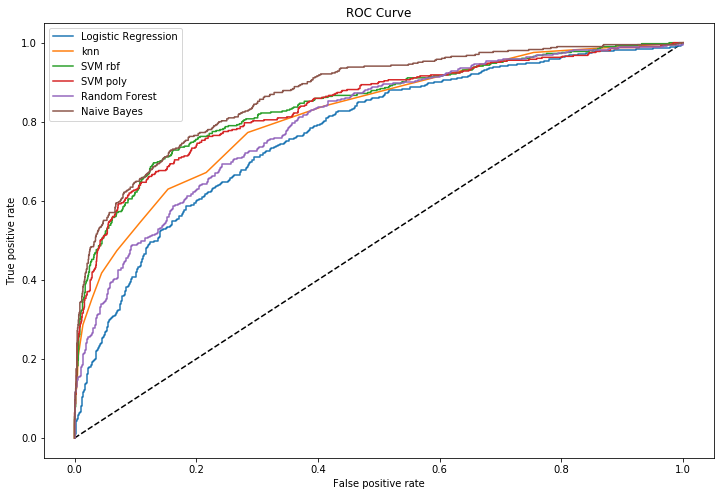

In [32]:
algos = [lr, knn_cv, SVM_rbf_cv, SVM_poly_cv, nb_m, xgb_cv]
labels = ['Logistic Regression', 'knn', 'SVM rbf', 'SVM poly', 'Random Forest','Naive Bayes', 'XGB']
from sklearn.metrics import roc_curve
plt.figure(figsize = (12,8))
plt.plot([0,1], [0,1], 'k--')

for i in range(len(algos)):
    y_pred_prob = algos[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=labels[i])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')

### **Neural Networks Artificial Intelligence Modeling and Evaluating**

### ANN

In [33]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
classifier = Sequential()

Using TensorFlow backend.


Instructions for updating:
non-resource variables are not supported in the long term



In [34]:
#Add Sequential Layers

classifier.add(Dense(output_dim = 6, init='uniform' , activation = 'relu', input_dim = 11 ))
classifier.add(Dense(output_dim = 6, init='uniform' , activation = 'relu' ))
classifier.add(Dense(output_dim = 1, init='uniform' , activation = 'sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=6, kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  after removing the cwd from sys.path.


In [35]:
 #Compile the ANN
classifier.compile(optimizer = 'adam', loss= 'binary_crossentropy', metrics = ['accuracy'] )

#fit 
classifier.fit(X_train, y_train, batch_size= 10, epochs= 100)

#predict
y_pred= classifier.predict(X_test)

#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred>0.5)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/100





8000/8000 [==============================] - 9s 1ms/step - loss: 0.4873 - acc: 0.7959
Epoch 2/100
8000/8000 [==============================] - 4s 478us/step - loss: 0.4286 - acc: 0.7960
Epoch 3/100
8000/8000 [==============================] - 4s 474us/step - loss: 0.4231 - acc: 0.7960
Epoch 4/100
8000/8000 [==============================] - 4s 462us/step - loss: 0.4188 - acc: 0.8184
Epoch 5/100
8000/8000 [==============================] - 4s 464us/step - loss: 0.4168 - acc: 0.8274
Epoch 6/100
8000/8000 [==============================] - 4s 444us/step - loss: 0.4145 - acc: 0.8295
Epoch 7/100
8000/8000 [==============================] - 4s 463us/step - loss: 0.4129 - acc: 0.8312
Epoch 8/100
8000/8000 [==============================] - 4s 448us/step - loss: 0.4115 - acc: 0.8310
Epoch 9/100
8000/8000 [==============================] - 3s 433us/step - loss: 0.4107 - acc: 0.831

Ok we can predict if a customer is going to churn not not with %86.3 accuracy which is pretty nice.

### We can now conclude our findings
The median age of people whom the bank retained is 37 with most values between 30-40. The median age of people who exited the bank is 45 with most values between 40-50 and is normally distributed. To improve on this the bank has to provide special services to senior citizen.
It is female who left the bank more than the male. The percentage of female who left the bank is 25%, whereas for male its 16%. We can conclude that the bank does not make females comfortable. The bank will have to provide special female services.
The inactive members churned more with 27%. Only 14% active members churned. But active members churning shows that customers must have been unsatisfied for any new policy or some other bank provided a scheme with much better services
Most churning of customers happened in Germany with almost 32% of customers leaving the bank. Customers of Germany have the most salary and Balance. This means the bank is not able to cater the elite class with elite services.
In spain around half of the females have a balance of zero.
### Hypothesis for further investigation
-  Age of people who left the bank and who did not are similar. 
-  Credit score of people who left the bank and who did not are similar. 
-  Balance of people who left the bank and who did not are similar. 
-  Estimated Salary of people who left the bank and who did not are similar.